In [28]:
!pip install librosa


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename=r"C:\Users\mishr\Downloads\UrbanSound8K\UrbanSound8K\audio\fold9\98859-7-2-4.wav"

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

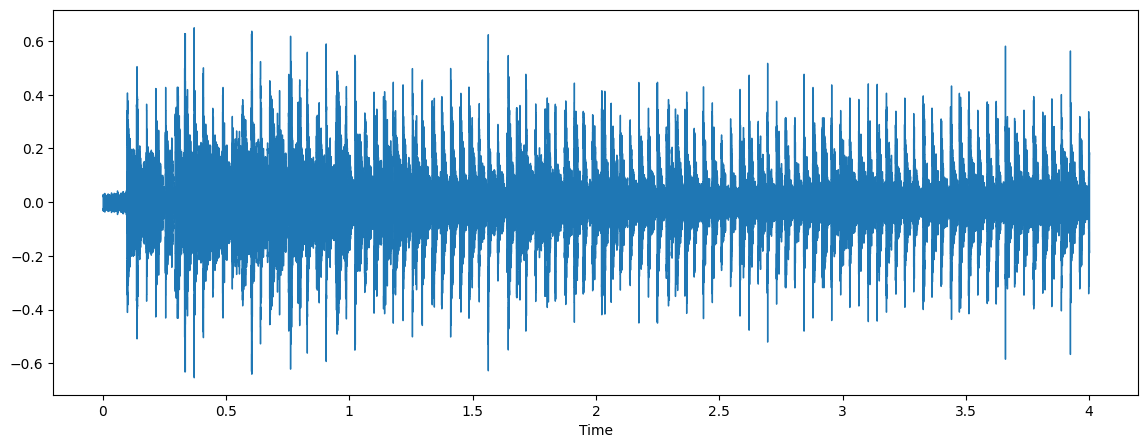

In [4]:

plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

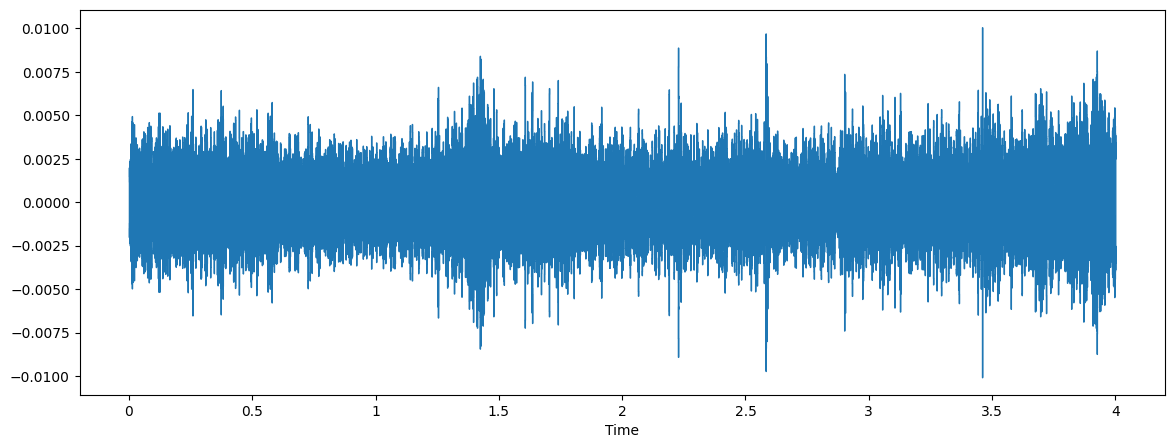

In [5]:
filename1=r"C:\Users\mishr\Downloads\UrbanSound8K\UrbanSound8K\audio\fold4\95404-3-0-5.wav"
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

In [6]:
sample_rate

22050

In [7]:
import pandas as pd

metadata=pd.read_csv(r"C:\Users\mishr\Downloads\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv")
metadata.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename1) 

In [9]:
### Checking whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [10]:
wave_audio

array([[-4626688, -3947520],
       [-4977152, -1571072],
       [-4385536,   520704],
       ...,
       [ 4137984,  5176320],
       [ 3714560,  7681024],
       [ 1260800,  9130496]])

In [11]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [12]:
mfccs

array([[-489.69803  , -463.26828  , -473.50024  , ..., -452.84116  ,
        -465.05524  , -484.2839   ],
       [  92.17883  ,   96.83149  ,  102.02342  , ...,   84.418106 ,
          96.41879  ,  100.793365 ],
       [ -14.003939 ,  -13.4256115,  -14.079753 , ...,   -3.4513235,
          -2.88238  ,   -6.9099064],
       ...,
       [  -8.444218 ,   -8.380544 ,   -3.4253423, ...,   -1.6855003,
          -2.9435177,   -3.7627907],
       [  -7.8064585,   -8.405888 ,   -2.7840433, ...,   -8.288525 ,
          -5.0765505,   -5.8753014],
       [  -2.3177617,   -2.2839065,   -2.1160262, ...,   -2.0466332,
          -5.951865 ,  -10.472148 ]], dtype=float32)

In [13]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r"C:\Users\mishr\Downloads\UrbanSound8K\UrbanSound8K\audio"
metadata=pd.read_csv(r"C:\Users\mishr\Downloads\UrbanSound8K\UrbanSound8K\metadata\UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
pip install resampy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import resampy

In [15]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    


In [16]:
import numpy as np
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(

732it [09:39, 15.06it/s]

In [17]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [18]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [19]:
print(X)

[[-2.1735526e+02  7.0223389e+01 -1.3038527e+02 ... -1.6930534e+00
  -6.1698347e-01  3.8600525e-01]
 [-4.2409818e+02  1.0934077e+02 -5.2919525e+01 ...  5.3489316e-01
  -5.4468715e-01  4.4632089e-01]
 [-4.5879114e+02  1.2138419e+02 -4.6520657e+01 ...  2.0768483e+00
   1.6962965e+00 -9.6140957e-01]
 ...
 [-3.0388824e+02  1.1135945e+02 -4.5941566e+01 ... -3.0292377e+00
   2.7170296e+00  7.6197419e+00]
 [-3.4411008e+02  1.2545021e+02 -5.4903442e+01 ... -7.9082427e+00
  -1.6414584e+00  5.6668439e+00]
 [-3.1560281e+02  9.4854805e+01 -3.7222340e+01 ...  6.1386442e-01
  -1.1449189e+01 -6.0105853e+00]]


In [20]:
### Label Encoding
import tensorflow

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [22]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [24]:
### No of classes
num_labels=y.shape[1]

In [25]:
# Model Creation

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.26902, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1179 - loss: 16.9511 - val_accuracy: 0.1465 - val_loss: 2.2690
Epoch 2/100

Epoch 2: val_loss improved from 2.26902 to 2.20755, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1397 - loss: 2.5913 - val_accuracy: 0.1649 - val_loss: 2.2076
Epoch 3/100

Epoch 3: val_loss improved from 2.20755 to 2.07752, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1716 - loss: 2.2754 - val_accuracy: 0.2885 - val_loss: 2.0775
Epoch 4/100

Epoch 4: val_loss improved from 2.07752 to 1.97912, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2198 - loss: 2.1514 - val_accuracy: 0.3131 - val_loss: 1.9791
Epoch 5/100

Epoch 5: val_loss improved from 1.9791

In [29]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7458500266075134


In [30]:
model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1.1524816e-01, 4.4772788e-03, 4.9538899e-02, ..., 5.6845689e-05,
        6.3807210e-03, 3.5856683e-02],
       [4.1444038e-04, 6.2140405e-02, 1.5768661e-01, ..., 1.7533430e-05,
        9.6289879e-03, 1.2023167e-01],
       [3.0619437e-06, 2.9897626e-02, 1.0829265e-03, ..., 1.7273376e-02,
        1.7885845e-04, 2.3597978e-02],
       ...,
       [2.0826100e-08, 9.1863787e-01, 8.7319740e-06, ..., 1.6581424e-07,
        1.4624253e-05, 7.6466955e-02],
       [3.1756237e-01, 1.4187799e-02, 2.1752276e-01, ..., 5.4070156e-02,
        2.5612144e-02, 1.7908081e-01],
       [2.4125817e-01, 1.3672193e-02, 1.6315600e-01, ..., 4.4401968e-03,
        2.4232641e-02, 1.2530483e-01]], dtype=float32)

In [31]:
filename=r"C:\Users\mishr\Downloads\UrbanSound8K\UrbanSound8K\bell_r.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)

mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)


predicted_label=model.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(predicted_label, axis=1)
prediction_class = labelencoder.inverse_transform(predicted_class_index) 
prediction_class

[-112.724236     -4.0653915     1.8628128    29.983063     -8.956801
   27.875141     -5.255162     12.64801      -9.106384      8.926067
  -14.896593     -1.7714399   -21.15787      16.20849     -18.841562
   -0.5033333   -21.42214      -5.843565     -2.4217875    -2.9707482
   -6.717379      3.7159076   -23.151049      7.570766     -9.971407
    4.199716     -8.371742      3.4085684    -6.5641704     3.3516226
   -5.299366     -0.6573542   -11.631474      3.76157      -5.652346
   -5.7084045    -1.2038257    -5.9777837    -2.935411      0.14812496]
[[-112.724236     -4.0653915     1.8628128    29.983063     -8.956801
    27.875141     -5.255162     12.64801      -9.106384      8.926067
   -14.896593     -1.7714399   -21.15787      16.20849     -18.841562
    -0.5033333   -21.42214      -5.843565     -2.4217875    -2.9707482
    -6.717379      3.7159076   -23.151049      7.570766     -9.971407
     4.199716     -8.371742      3.4085684    -6.5641704     3.3516226
    -5.299366     -0.

array(['jackhammer'], dtype='<U16')